<a href="https://colab.research.google.com/github/sandipanpaul21/Tree-Based-Models-in-Python/blob/master/06_Decision_Trees_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Regression Trees work in principal in the same way as Classification Trees with the large difference that the target feature values can now take on an infinite number of continuously scaled values. 

- Hence the task is now to predict the value of a continuously scaled target feature Y given the values of a set of categorically (or continuously) scaled descriptive features X.

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'Number_of_Bedrooms':[2,2,4,1,3,1,4,2],'Price_of_Sale':[100000,120000,250000,80000,220000,170000,500000,75000]})
df

,Number_of_Bedrooms,Price_of_Sale
0,2,100000
1,2,120000
2,4,250000
3,1,80000
4,3,220000
5,1,170000
6,4,500000
7,2,75000


**Now how would we calculate the entropy of the Number_of_Bedrooms feature?**

$H(Number of Bedrooms) = \sum_{j \ \in \ Number \ of \ Bedrooms}*(\frac{|D_{Number \ of \ Bedrooms = j}|}{|D|} * (\sum_{k \ \in \ Price \ of \ Sale}*(-P(k \ | \ j)*log2(P(k \ | \ j))))) $

- If we calculate the weighted entropies, we see that for j = 3, we get a weighted entropy of 0. We get this result because there is only one house in the dataset with 3 bedrooms. 
- On the other hand, for j = 2 (occurs three times) we will get a weighted entropy of 0.59436.
- To make a long story short, since our target feature is continuously scaled, the IGs of the categorically scaled descriptive features are no longer appropriate splitting criteria.

Well, we could instead categorize the target feature along its values where
  1. housing prices between Rs.0 and Rs.80000 are categorized as low 
  2. between Rs. 80001 and Rs. 150000 as middle 
  3. price > Rs. 150001 as high.

What we have done here is converting our regression problem into kind of a classification problem. 

Though, since we want to be able to make predictions from a infinite number of possible values (regression) this is not what we are looking for.

In [ ]:
# Manual Binning

# We specify in the code about where the bins are to be created.
df['Manual_BINS']=pd.cut(df['Price_of_Sale'],bins=[0,80000,150000,500000],
                         labels=["Low","Medium","High"])
df

,Number_of_Bedrooms,Price_of_Sale,Manual_BINS
0,2,100000,Medium
1,2,120000,Medium
2,4,250000,High
3,1,80000,Low
4,3,220000,High
5,1,170000,High
6,4,500000,High
7,2,75000,Low


**Maths behind regression trees**

As stated above, the task during growing a Regression Tree is in principle the same as during the creation of Classification Trees. Though, since the IG (Information Gain) turned out to be no longer an appropriate splitting criteria (neither is the Gini Index) due to the continuous character of the target feature we must have a new splitting criteria.

**Therefore we use the variance**

Variance

$Var(x) = \frac{\sum_{i \ = 1}^n(y_i-\bar{y})}{n-1}$

Where 

  1. $y_i$ are the single target feature values 
  2. $\bar{y}$ is the mean of these target feature values.

Taking the example from above the total variance of the Prize_of_Sale target feature is calculated with:

$Var(Price \ of \ Sale) = \frac{(100000-189375)^2+(120000-189375)^2+(250000-189375)^2+(80000-189375)^2+(220000-189375)^2+(170000-189375)^2+(500000-189375)^2+(75000-189375)^2}{7}$
$= 19.903125*10^9$ 

Since we want to know which descriptive feature is best suited to split the target feature on, we have to calculate the variance for each value of the descriptive feature with respect to the target feature values.

Hence for the Number_of_Rooms descriptive feature above we get for the single numbers of rooms:

$Var(Number \ of \ Rooms \ = \ 1) = \frac{(80000-125000)^2+(170000-125000)^2}{1}=4050000000$

$Var(Number \ of \ Rooms \ = \ 2) = \frac{(100000-98333.3)^2+(120000-98333.3)^2+(75000-98333.3)^2}{2} = 508333333.3$

$Var(Number \ of \ Rooms \ = \ 3) = (220000-220000)^2 = 0$

$Var(Number \ of \ Rooms \ = \ 4) = \frac{(250000-375000)^2+(500000-375000)^2}{1} = 31250000000$

Since we now want to also address the issue that there are feature values which occur relatively rarely but have a high variance 

This could lead to a very high variance for the whole feature just because of one outlier feature value even though the variance of all other feature values may be small we address this by calculating the weighted variance for each feature value with:

$WeightVar(Number \ of \ Rooms \ = \ 1) = \frac{2}{8}*4050000000 =1012500000$

$WeightVar(Number \ of \ Rooms \ = \ 2) = \frac{2}{8}*508333333.3 = 190625000$

$WeightVar(Number \ of \ Rooms \ = \ 3) = \frac{2}{8}*0 =0 $

$WeightVar(Number \ of \ Rooms \ = \ 4) = \frac{2}{8}*31250000000 = 7812500000$

Finally, we sum up these weighted variances to make an assessment about the feature as a whole:

$SumVar(feature) = \sum_{value \ \in \ feature} WeightVar(feature_{value})$

Which is in our case:

$1012500000+190625000+0+7812500000=9015625000$

Putting all this together finally leads to the formula for the weighted feature variance which we will use at each node in the splitting process to determine which feature we should choose to split our dataset on next.

$feature[choose] \ = \underset{f \ \in \ features}{\operatorname{argmin}} \ \sum_{l \ \in \ levels(f)} \frac{|f = l|}{|f|}*Var(t,f=l)$
$= \underset{f \ \in \ features}{\operatorname{argmin}} \ \sum_{l \ \in \ levels(f)} \frac{|f = l|}{|f|}*\frac{\sum_{i \ = \ 1}^n (t_i-\bar{t})^2}{n-1}$

Here f denotes a single feature, l denotes the value of a feature (e.g Price == medium), t denotes the value of the target feature in the subset where f=l.

In [ ]:
# Take Another Example 

raw_data = pd.DataFrame({"season":    [2,4,2,4,2,3,2,1,2],
                         "weekday":   [6,1,4,6,5,5,2,1,2],
                         "weathersit":[2,2,1,1,1,1,3,3,1],
                         "cnt":[352,109,421,165,12,161,162,79,112],})
raw_data

,season,weekday,weathersit,cnt
0,2,6,2,352
1,4,1,2,109
2,2,4,1,421
3,4,6,1,165
4,2,5,1,12
5,3,5,1,161
6,2,2,3,162
7,1,1,3,79
8,2,2,1,112


###**Calculate Variance for Above Dataset and which feature to choose first as Root Node**

####**Season**

$WeightVar(Season) = \frac{1}{9}*(79-79)^2+\frac{5}{9}*\frac{(352-211.8)^2+(421-211.8)^2+(12-211.8)^2+(162-211.8)^2+(112-211.8)^2}{4}+\frac{1}{9}*(161-161)^2+\frac{2}{9}*\frac{(109-137)^2+(165-137)^2}{1}$
$= 16429.1$

####**Weekday**

$WeightVar(Weekday) = \frac{2}{9}*\frac{(109-94)^2+(79-94)^2}{1}+\frac{2}{9}*\frac{(162-137)^2+(112-137)^2}{1}+\frac{1}{9}*(421-421)^2+\frac{2}{9}*\frac{(161-86.5)^2+(12-86.5)^2}{1}+\frac{2}{9}*\frac{(352-258.5)^2+(165-258.5)^2}{1} = 6730$

####**Weathersit**


$WeightVar(Weathersit) = \frac{4}{9}*\frac{(421-174.2)^2+(165-174.2)^2+(12-174.2)^2+(161-174.2)^2+(112-174.2)^2}{4}+\frac{2}{9}*\frac{(352-230.5)^2+(109-230.5)^2}{1}+\frac{2}{9}*\frac{(79-120.5)^2+(112-120.5)^2}{1} = 19646.83 $

Since the Weekday feature has the lowest variance, this feature is used to split the dataset on and hence serves as root node. 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 
import warnings
warnings.filterwarnings("ignore")

Boston housing dataset prediction.
R-squared: 0.8063826200482354
MSE:  0.32826688147153504
RMSE:  0.16413344073576752


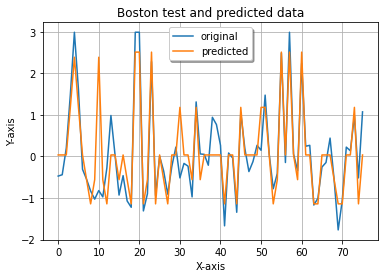

In [ ]:
print("Boston housing dataset prediction.")
boston = load_boston()
x, y = boston.data, boston.target

x = scale(x)
y = scale(y)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.15)

# To keep the size of the tree small, I set max_depth = 3.
regressor = DecisionTreeRegressor(max_depth=3, random_state=1234)
regressor.fit(xtrain, ytrain) 

score = regressor.score(xtrain, ytrain)
print("R-squared:", score)

ypred = regressor.predict(xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
from sklearn import tree
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_5 <= 0.94
|   |--- feature_12 <= 0.24
|   |   |--- feature_7 <= -1.12
|   |   |   |--- value: [2.39]
|   |   |--- feature_7 >  -1.12
|   |   |   |--- value: [0.04]
|   |--- feature_12 >  0.24
|   |   |--- feature_0 <= 0.25
|   |   |   |--- value: [-0.56]
|   |   |--- feature_0 >  0.25
|   |   |   |--- value: [-1.14]
|--- feature_5 >  0.94
|   |--- feature_5 <= 1.64
|   |   |--- feature_0 <= 1.10
|   |   |   |--- value: [1.18]
|   |   |--- feature_0 >  1.10
|   |   |   |--- value: [-1.07]
|   |--- feature_5 >  1.64
|   |   |--- feature_0 <= -0.10
|   |   |   |--- value: [2.51]
|   |   |--- feature_0 >  -0.10
|   |   |   |--- value: [-0.07]



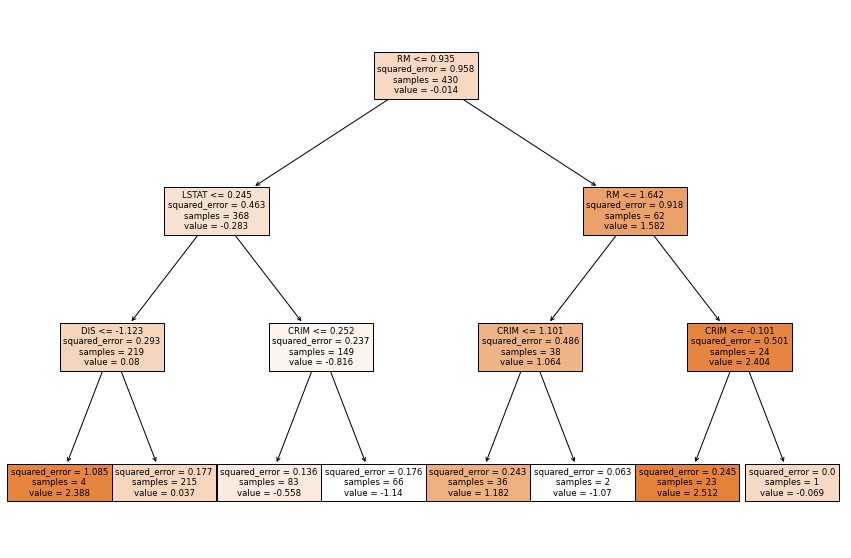

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(regressor, feature_names=boston.feature_names, filled=True)